# Exploratory Data Analysis

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'acms80695-384817' # Project ID inserted based on the query results selected to explore
location = 'us-central1' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [ ]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Define a custom color palette with a single black color
black_palette = sns.color_palette(['black'])

# Set the color palette to the custom palette
sns.set_palette(black_palette)

# Set the Style to Darkgrid
sns.set_style("darkgrid")

# Result set loaded from BigQuery job as a DataFrame

In [ ]:
# Running this code will read results from your previous job
job = client.get_job('bquxjob_3fde09c8_187db04c836') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
# Filter Out Values with Options Prices Less Than or Equal to 1 Cent or Greater than 10k
results = results[(results['midpoint'] > 0.01) & (results['midpoint'] < 100000)]
# Filter Out Values with Negative Risk Free Rate Values
results = results[results['zero_coupon'] > 0]
# Filter Out Values with Negative Dividend Yields
results = results[results['div_yield'] > 0]
# Preview DataFrame
results.head()

,secid,date,strike_price,impl_volatility,under_price,zero_coupon,div_yield,midpoint,opt_type,time,...,under_lag11,under_lag12,under_lag13,under_lag14,under_lag15,under_lag16,under_lag17,under_lag18,under_lag19,under_lag20
5,100936,1996-08-20,160.0,0.316058,186.460000000,6.439493,0.780606,5.3125,0,0.585900,...,186.920000000,180.710000000,180.130000000,179.750000000,171.120000000,171.820000000,175.200000000,172.070000000,172.700000000,175.310000000
6,101490,1996-08-20,250.0,0.408764,318.750000000,6.439493,1.003994,83.0000,1,0.585900,...,315.970000000,321.490000000,311.899900000,306.490000000,303.480000000,298.019800000,305.460000000,295.470000000,284.950000000,280.529800000
7,109762,1996-08-20,350.0,0.171279,346.419900000,6.439493,1.183686,8.1250,0,0.087611,...,340.720000000,340.960000000,334.789800000,326.919900000,326.089800000,324.859900000,328.220000000,325.659900000,327.279800000,326.789800000
10,108944,1996-08-20,340.0,0.159464,324.869900000,6.439493,1.212716,14.1250,1,0.662560,...,319.490000000,320.000000000,315.409900000,308.629900000,307.929900000,305.950000000,309.019800000,308.169900000,309.009800000,308.409900000
11,108944,1996-08-20,310.0,0.197157,324.869900000,6.439493,1.212716,31.6250,1,0.662560,...,319.490000000,320.000000000,315.409900000,308.629900000,307.929900000,305.950000000,309.019800000,308.169900000,309.009800000,308.409900000


# Exploratory Data Analysis

In [ ]:
results.describe()

,secid,strike_price,impl_volatility,zero_coupon,div_yield,midpoint,opt_type,time
count,10750886.0,1.075089e+07,1.075089e+07,1.075089e+07,1.075089e+07,1.075089e+07,10750886.0,1.075089e+07
mean,116855.101457,1.369924e+03,5.146088e-01,2.902254e+00,2.361179e+00,1.288832e+02,0.50971,5.877868e-01
std,24901.240698,2.406362e+03,4.430403e-01,1.997617e+00,2.044926e+00,3.069273e+02,0.499906,5.346795e-01
min,100910.0,5.000000e+00,1.120200e-02,2.934528e-01,1.070000e-04,1.500000e-02,0.0,2.737851e-03
25%,102434.0,2.750000e+02,2.353610e-01,1.291488e+00,1.271437e+00,6.500000e+00,0.0,2.162902e-01
50%,108105.0,6.200000e+02,3.668820e-01,2.205105e+00,1.877972e+00,3.200000e+01,1.0,5.201916e-01
75%,112878.0,1.495000e+03,6.167400e-01,4.575809e+00,2.535226e+00,1.121000e+02,1.0,7.392197e-01
max,189691.0,2.150000e+04,2.999987e+00,7.631664e+00,1.473539e+02,1.326700e+04,1.0,4.796715e+00


<Axes: xlabel='midpoint', ylabel='Count'>

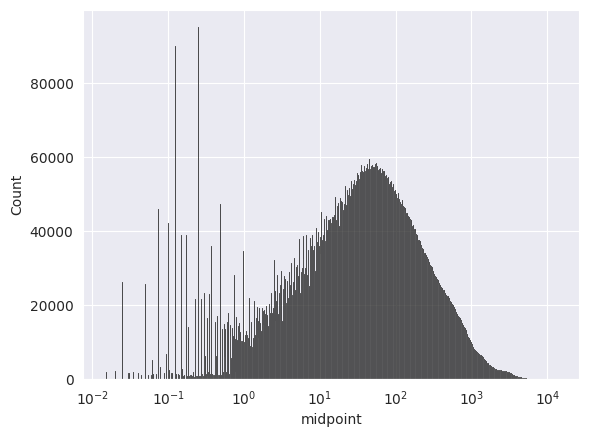

In [ ]:
sns.histplot(results['midpoint'], log_scale=True)

<Axes: xlabel='strike_price', ylabel='Count'>

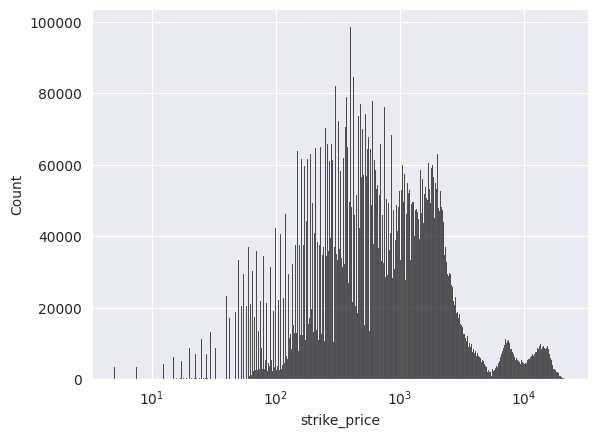

In [ ]:
sns.histplot(results['strike_price'], log_scale=True)

<Axes: xlabel='impl_volatility', ylabel='Count'>

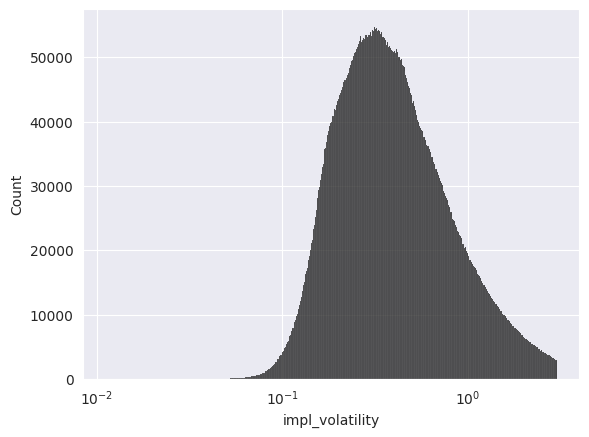

In [ ]:
sns.histplot(results['impl_volatility'], log_scale=True)

<Axes: xlabel='zero_coupon', ylabel='Count'>

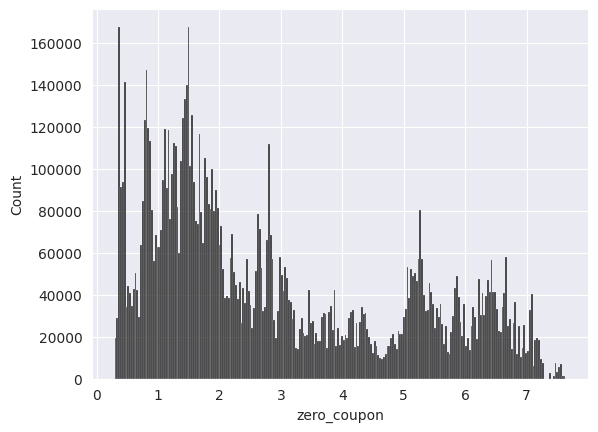

In [ ]:
sns.histplot(results['zero_coupon'])

<Axes: xlabel='div_yield', ylabel='Count'>

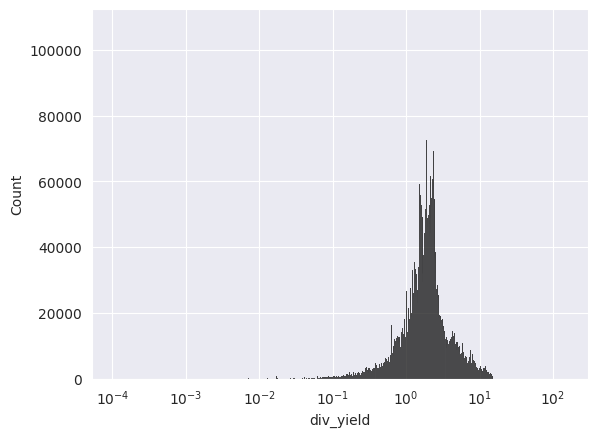

In [ ]:
sns.histplot(results['div_yield'], log_scale=True)

<Axes: xlabel='time', ylabel='Count'>

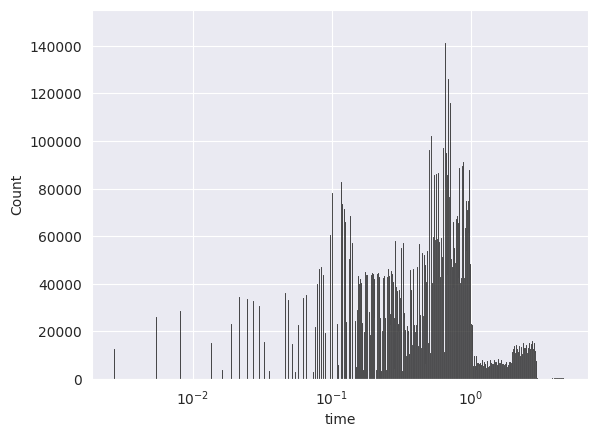

In [ ]:
sns.histplot(results['time'], log_scale=True)

<Axes: xlabel='opt_type', ylabel='count'>

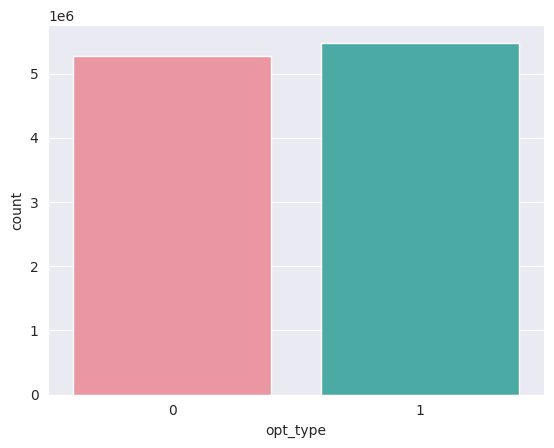

In [ ]:
sns.countplot(x=results['opt_type'])